In [1]:
!pip install kaggle --quiet
!mkdir -p ~/.kaggle

from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jayaprakashpondy/pancreatic-ct-images
!unzip pancreatic-ct-images.zip -d /content/pancreatic_ct_images


Saving kaggle (1).json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/jayaprakashpondy/pancreatic-ct-images
License(s): CC0-1.0
  0% 0.00/70.1M [00:00<?, ?B/s]
100% 70.1M/70.1M [00:00<00:00, 999MB/s]
Archive:  pancreatic-ct-images.zip
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-001.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-002.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-003.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-004.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-005.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-006.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-007.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-008.jpg  
  inflating: /content/pancreatic_ct_images/DATASET/test/test/normal/1-009.jpg  
  inflating: /content/pancre

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/pancreatic_ct_images /content/drive/MyDrive/


Mounted at /content/drive
^C


In [3]:
import os

data_dir = "/content/pancreatic_ct_images"
for root, dirs, files in os.walk(data_dir):
    print(root, len(files), "files")


/content/pancreatic_ct_images 0 files
/content/pancreatic_ct_images/DATASET 0 files
/content/pancreatic_ct_images/DATASET/test 0 files
/content/pancreatic_ct_images/DATASET/test/test 0 files
/content/pancreatic_ct_images/DATASET/test/test/pancreatic_tumor 187 files
/content/pancreatic_ct_images/DATASET/test/test/normal 225 files
/content/pancreatic_ct_images/DATASET/train 0 files
/content/pancreatic_ct_images/DATASET/train/train 0 files
/content/pancreatic_ct_images/DATASET/train/train/pancreatic_tumor 578 files
/content/pancreatic_ct_images/DATASET/train/train/normal 421 files


Classes: ['pancreatic_tumor', 'normal']


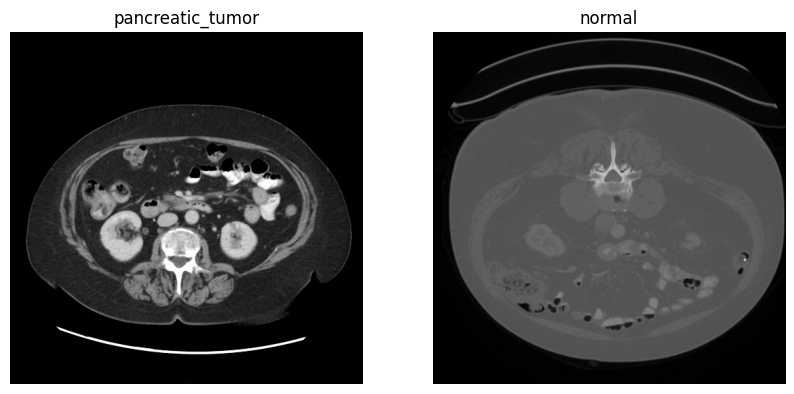

In [5]:
import cv2
import matplotlib.pyplot as plt

train_dir = "/content/pancreatic_ct_images/DATASET/train/train"
test_dir  = "/content/pancreatic_ct_images/DATASET/test/test"

classes = os.listdir(train_dir)
print("Classes:", classes)

plt.figure(figsize=(10,5))
for i, cls in enumerate(classes):
    img_path = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(classes), i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()


In [6]:
import numpy as np
from tqdm import tqdm

train_dir = "/content/pancreatic_ct_images/DATASET/train/train"
test_dir  = "/content/pancreatic_ct_images/DATASET/test/test"

classes = os.listdir(train_dir)
print("Classes:", classes)

images, labels = [], []

for cls in classes:
    cls_path = os.path.join(train_dir, cls)
    for img_name in tqdm(os.listdir(cls_path), desc=f"Loading {cls}"):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(cls)

images = np.array(images)
labels = np.array(labels)

print("Dataset loaded!")
print("Images shape:", images.shape)
print("Labels:", labels.shape)


Classes: ['pancreatic_tumor', 'normal']


Loading normal: 100%|██████████| 421/421 [00:01<00:00, 217.11it/s]


Dataset loaded!
Images shape: (999, 224, 224, 3)
Labels: (999,)
